In [ ]:
!pip install lightning==2.0.1

In [5]:
!git clone https://github.com/madaanpulkit/SageRef.git
%cd SageRef

fatal: destination path 'SageRef' already exists and is not an empty directory.
/content/SageRef


In [6]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from PIL import Image
from torchvision.transforms import transforms, ToPILImage
from torch.utils.data import DataLoader

In [7]:
from src.model import Autoencoder

In [8]:
latent_dim = 64
learning_rate = 0.0005

In [9]:
to_tensor = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

to_image = transforms.ToPILImage()

denormalize = transforms.Normalize((-0.5 / 0.5,), (1.0 / 0.5,))

In [10]:
ckpt_path = "/content/drive/MyDrive/SageRefProject/checkpoints/best.ckpt"
module = Autoencoder(latent_dim, learning_rate)
module = module.load_from_checkpoint(ckpt_path)

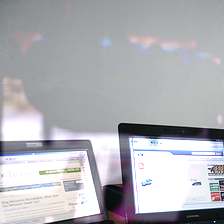

In [13]:
image_path = '/content/drive/MyDrive/SageRefProject/test_images/image1.png'
# image_path = '/content/drive/MyDrive/SageRefProject/test_images/image2.png'
image = Image.open(image_path)
image.show()

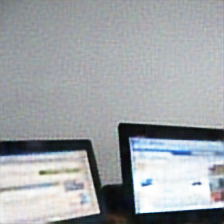

In [14]:
image_tensor = to_tensor(image).unsqueeze(0)
results = module(image_tensor)
normalized_tensor = denormalize(results)
new_image = to_image(normalized_tensor.squeeze(0))
new_image.show()